In [1]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
import matplotlib.pyplot as plt
from pydub import AudioSegment
import numpy as np
from scipy import signal, misc
import os
import glob

In [2]:
path = r'*.m4a'
m4a_files = glob.glob(path)
wav_files = []

In [3]:
for m4a_file in m4a_files:
    track = AudioSegment.from_file(m4a_file,  format='m4a')
    wav_filename = m4a_file[:-4]+".wav"
    wav_files.append(wav_filename)
    file_handle = track.export(wav_filename, format='wav')

In [4]:
window = 0.02
samp = 0.0005

In [5]:
signals = []

for wav in wav_files:
    [Fs, x] = audioBasicIO.read_audio_file(wav)
    F, f_names = ShortTermFeatures.feature_extraction(x, Fs, window*Fs, samp*Fs)
    signals.append(F[1, :])

0
1
2
3
4
5


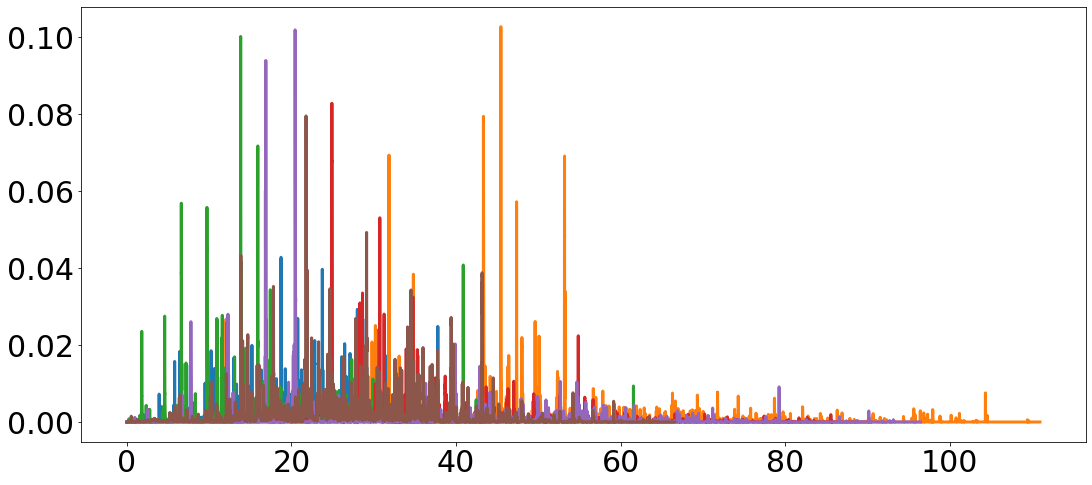

In [6]:
times = []

fig, ax = plt.subplots(figsize=(18, 8))
i=0
for sign in signals:
    print(i)
    i+=1
    ts = np.linspace(0.0, len(sign)*samp, len(sign))
    times.append(ts)
    ax.plot(ts, sign, linewidth=3)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.show()

In [7]:
peaks_all = []
n_events = []

for idx, sign in enumerate(signals):
    peaks, properties = signal.find_peaks(sign, prominence=(0.001, 1))
    peak_ts = [times[idx][peak] for peak in peaks]
    n_events.append(len(peak_ts))
    peaks_all.append(peak_ts)

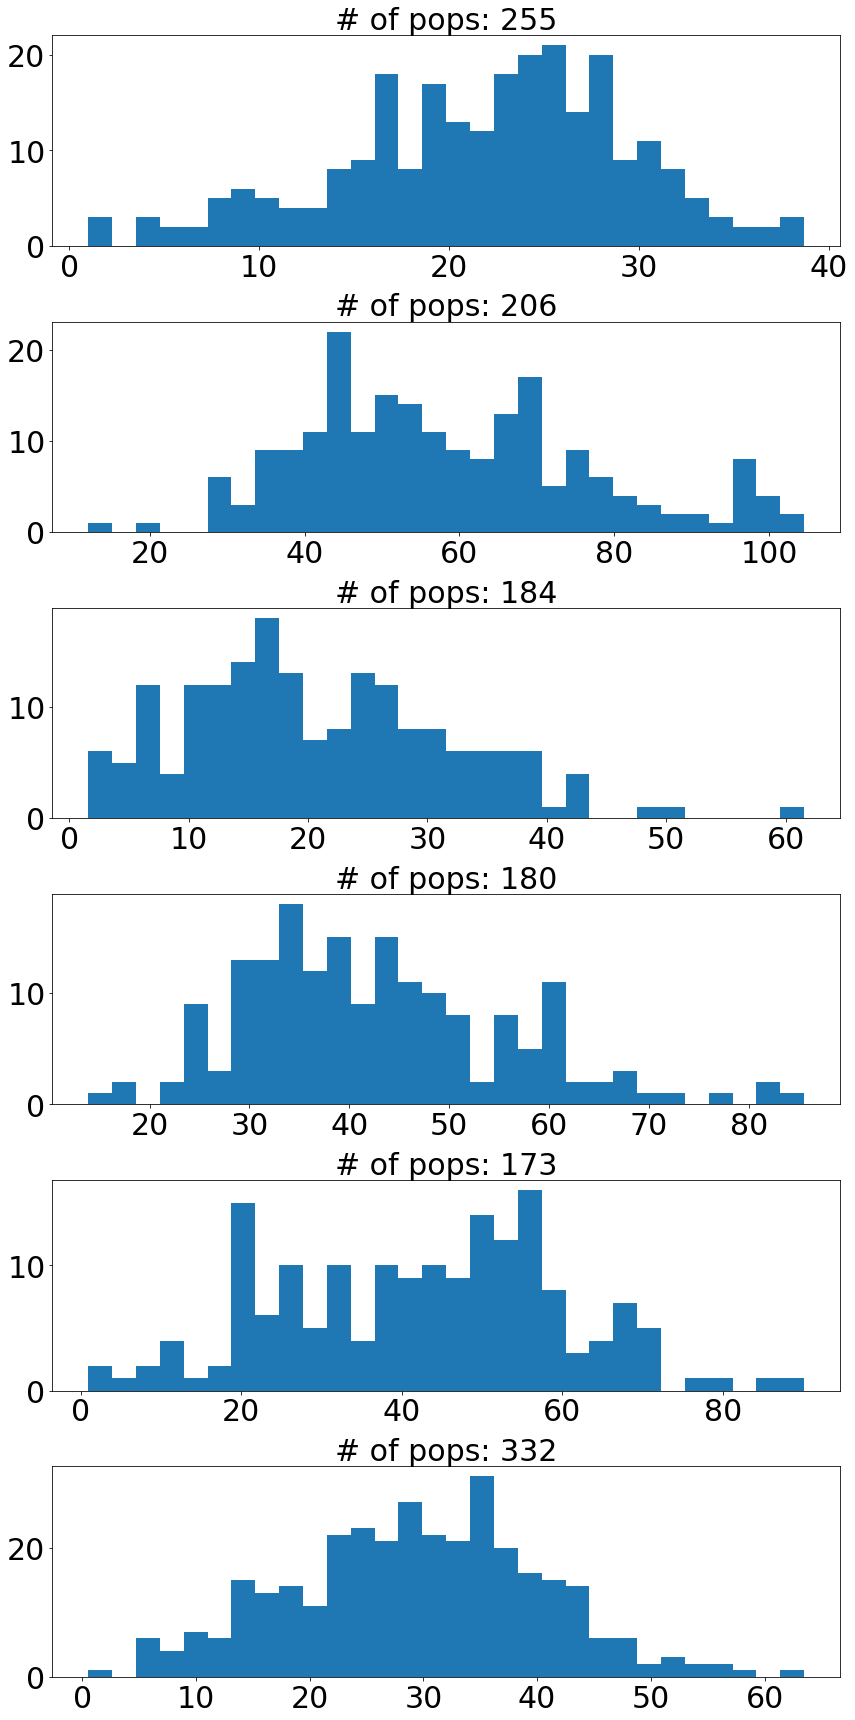

In [8]:
n = len(peaks_all)

fig, axs = plt.subplots(n, figsize=(12, 4*n))

for idx, popcorn in enumerate(peaks_all):
    axs[idx].hist(peaks_all[idx], bins=30)
    axs[idx].tick_params(axis='both', which='major', labelsize=30)
    axs[idx].set_title(f"# of pops: {n_events[idx]}", fontsize=30)
fig.tight_layout()
#plt.savefig("popcorn_histograms.png")
plt.show()

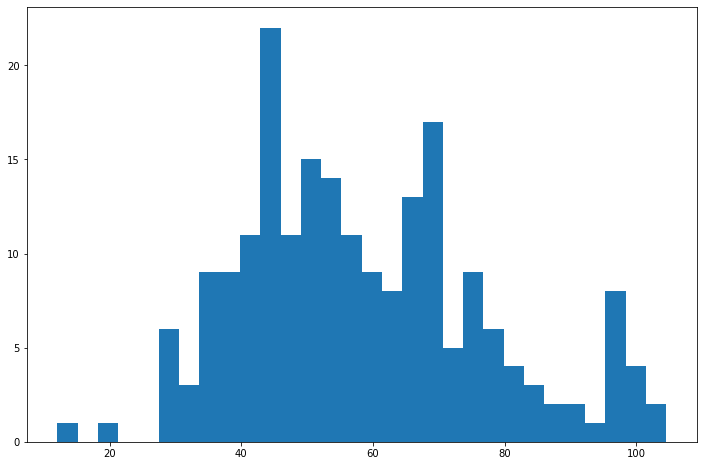

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(peaks_all[1], bins=30)
plt.show()